In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amandp13/Flood-Prediction-Model/master/kerala.csv')
print(data)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

## EXPLORATORY DATA ANALYSIS

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [5]:
print(data.shape)

(118, 16)


In [6]:
data.isnull().sum()  # cheaki for missing values.

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [7]:
data.dtypes

SUBDIVISION          object
YEAR                  int64
JAN                 float64
FEB                 float64
MAR                 float64
APR                 float64
MAY                 float64
JUN                 float64
JUL                 float64
AUG                 float64
SEP                 float64
OCT                 float64
NOV                 float64
DEC                 float64
 ANNUAL RAINFALL    float64
FLOODS               object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [9]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [10]:
data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['FLOODS'] = le.fit_transform(data['FLOODS'])

In [12]:
#Printing the clean data
data.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


## Plotting the Data

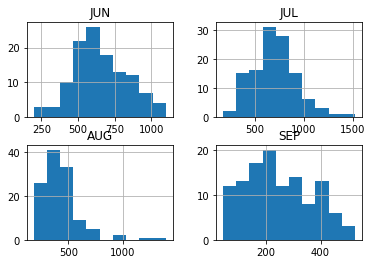

In [13]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()
# How the rainfall index vary during rainy season

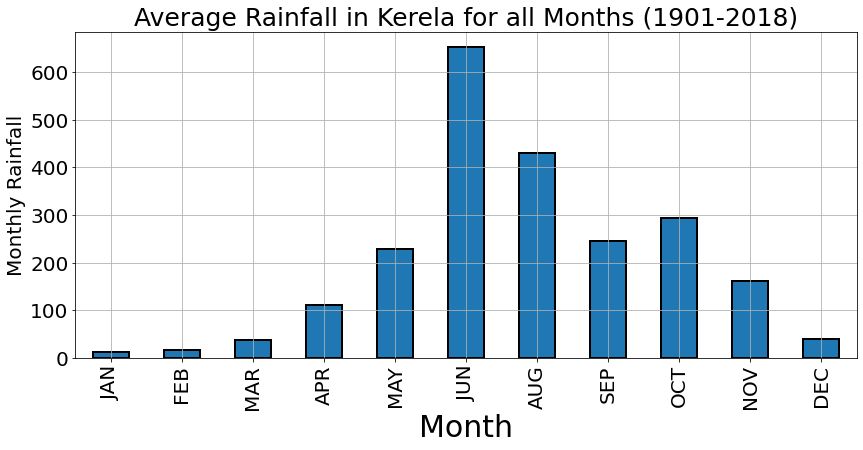

In [14]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Average Rainfall in Kerela for all Months (1901-2018)',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

## Feature Selection

In [93]:
# Seperating the data which we are gonna use for prediction.
X=data.iloc[:,1:14]
X.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [94]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int32

In [95]:
##dividing the dataset into training dataset and test dataset. 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
78,1979,2.4,30.0,11.7,42.0,127.7,582.9,662.2,383.7,211.7,163.8,261.7,23.3
93,1994,24.3,27.1,18.1,154.5,141.3,845.0,955.5,479.9,212.6,428.4,117.6,6.5
45,1946,1.8,5.4,108.4,139.8,83.0,919.0,671.7,695.6,199.4,266.1,273.0,202.3
91,1992,2.4,0.9,0.1,43.0,218.4,819.3,767.8,508.0,297.5,290.7,287.6,3.7
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1965,9.1,0.9,28.3,109.8,214.5,597.7,465.1,296.1,150.1,183.7,131.7,155.5
39,1940,0.6,1.5,3.8,126.5,217.4,606.4,877.3,610.8,68.2,257.7,287.5,60.1
72,1973,0.0,0.3,12.3,131.5,119.9,617.0,583.5,487.5,61.3,260.8,84.5,53.8
63,1964,1.1,7.8,67.2,83.3,94.8,379.4,754.2,548.0,398.2,325.7,191.7,17.8


In [96]:
print(X_test)

     YEAR   JAN   FEB   MAR    APR    MAY    JUN     JUL     AUG    SEP  \
68   1969   2.7   6.4  19.4  117.2  227.4  550.5   818.8   284.8  216.4   
55   1956   7.9  11.7  15.1  151.6  351.3  755.4   466.8   319.5  178.4   
98   1999   1.8  23.8  21.4  111.6  453.2  607.3   700.4   266.3   88.0   
19   1920  35.2   5.5  24.1  172.0   87.7  964.3   940.8   235.0  178.0   
6    1907  18.8   4.8  55.7  170.8  101.4  770.9   760.4   981.5  225.0   
15   1916   0.0   7.8  22.0   82.4  199.0  920.2   513.9   396.9  339.3   
27   1928  12.7  65.9  51.3  121.1   81.9  590.7   420.6   553.2   75.9   
83   1984  36.8  60.0  95.3  162.1   84.6  842.6   653.6   284.4  171.1   
11   1912   1.9  15.0  11.2  122.7  217.3  948.2   833.6   534.4  136.8   
82   1983   0.2   1.5   0.9   13.1   76.0  322.8   583.2   579.9  421.1   
48   1949   0.6   1.8   4.5   98.1  440.0  536.3   758.7   445.2  354.5   
30   1931   3.3   0.3  19.2  126.9  131.7  541.7   653.9  1199.2  163.2   
115  2016   2.4   3.8  35

In [97]:
print(y_train)

78     0
93     1
45     1
91     1
114    0
      ..
64     0
39     1
72     0
63     0
49     1
Name: FLOODS, Length: 82, dtype: int32


In [98]:
print(y_test)

68     0
55     0
98     0
19     1
6      1
15     1
27     0
83     0
11     1
82     0
48     1
30     1
115    0
40     1
76     1
22     1
38     1
12     0
8      1
2      1
29     1
88     0
16     0
46     1
25     1
117    1
62     0
33     0
28     1
73     0
7      0
77     1
65     0
37     0
74     1
61     1
Name: FLOODS, dtype: int32


## Feature Scaling

In [99]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [100]:
print(X_train)

     YEAR   JAN   FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
78   1979   2.4  30.0   11.7   42.0  127.7  582.9  662.2  383.7  211.7  163.8   
93   1994  24.3  27.1   18.1  154.5  141.3  845.0  955.5  479.9  212.6  428.4   
45   1946   1.8   5.4  108.4  139.8   83.0  919.0  671.7  695.6  199.4  266.1   
91   1992   2.4   0.9    0.1   43.0  218.4  819.3  767.8  508.0  297.5  290.7   
114  2015   3.1   5.8   50.1  214.1  201.8  563.6  406.0  252.2  292.9  308.1   
..    ...   ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
64   1965   9.1   0.9   28.3  109.8  214.5  597.7  465.1  296.1  150.1  183.7   
39   1940   0.6   1.5    3.8  126.5  217.4  606.4  877.3  610.8   68.2  257.7   
72   1973   0.0   0.3   12.3  131.5  119.9  617.0  583.5  487.5   61.3  260.8   
63   1964   1.1   7.8   67.2   83.3   94.8  379.4  754.2  548.0  398.2  325.7   
49   1950   0.1  53.7   31.1   68.5  242.0  638.3  905.7  387.3  411.6  250.4   

       NOV    DEC  
78   26

In [101]:
print(X_test)

     YEAR   JAN   FEB   MAR    APR    MAY    JUN     JUL     AUG    SEP  \
68   1969   2.7   6.4  19.4  117.2  227.4  550.5   818.8   284.8  216.4   
55   1956   7.9  11.7  15.1  151.6  351.3  755.4   466.8   319.5  178.4   
98   1999   1.8  23.8  21.4  111.6  453.2  607.3   700.4   266.3   88.0   
19   1920  35.2   5.5  24.1  172.0   87.7  964.3   940.8   235.0  178.0   
6    1907  18.8   4.8  55.7  170.8  101.4  770.9   760.4   981.5  225.0   
15   1916   0.0   7.8  22.0   82.4  199.0  920.2   513.9   396.9  339.3   
27   1928  12.7  65.9  51.3  121.1   81.9  590.7   420.6   553.2   75.9   
83   1984  36.8  60.0  95.3  162.1   84.6  842.6   653.6   284.4  171.1   
11   1912   1.9  15.0  11.2  122.7  217.3  948.2   833.6   534.4  136.8   
82   1983   0.2   1.5   0.9   13.1   76.0  322.8   583.2   579.9  421.1   
48   1949   0.6   1.8   4.5   98.1  440.0  536.3   758.7   445.2  354.5   
30   1931   3.3   0.3  19.2  126.9  131.7  541.7   653.9  1199.2  163.2   
115  2016   2.4   3.8  35

## MODELS BUILDING:

In [145]:
## Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [146]:
y_pred = classifier.predict(X_test)
y_pred


array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [147]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
68     0
55     0
98     0
19     1
6      1
15     1
27     0
83     0
11     1
82     0
48     1
30     1
115    0
40     1
76     1
22     1
38     1
12     0
8      1
2      1
29     1
88     0
16     0
46     1
25     1
117    1
62     0
33     0
28     1
73     0
7      0
77     1
65     0
37     0
74     1
61     1
Name: FLOODS, dtype: int32


In [148]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
knn_acc=cross_val_score(classifier,X_train,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(classifier,X_train,y_train,cv=3,method='predict_proba')

In [149]:
knn_acc

array([0.82142857, 0.81481481, 0.81481481])

In [150]:
knn_proba

array([[0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [1. ,


Accuracy Score:91.666667
Recall Score:85.000000
[[16  0]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.85      0.92        20

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



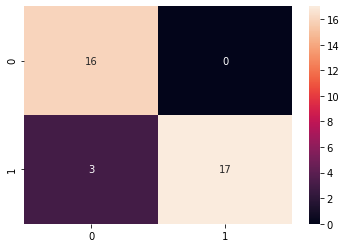

In [170]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(cm, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [152]:
from sklearn import metrics

In [153]:
y_pred_proba= classifier.predict_proba(X_test) [::,1]

In [154]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [155]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

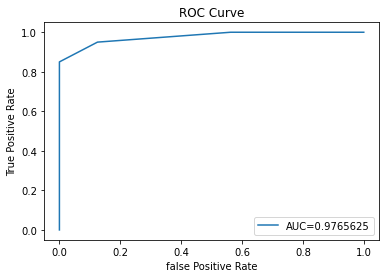

In [156]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

In [175]:
## Logistic Regression to predict

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_acc=cross_val_score(lr,X_train,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,X_train,y_train,cv=3,method='predict_proba')

C:\Users\selor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\selor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [176]:
lr_acc

array([0.85714286, 0.92592593, 0.85185185])

In [177]:
lr_proba

array([[9.99999999e-01, 1.09727020e-09],
       [2.89797897e-09, 9.99999997e-01],
       [0.00000000e+00, 1.00000000e+00],
       [7.83795251e-12, 1.00000000e+00],
       [1.00000000e+00, 9.13816509e-17],
       [9.99804472e-01, 1.95527606e-04],
       [1.00000000e+00, 1.12429634e-18],
       [2.86273970e-07, 9.99999714e-01],
       [9.99999888e-01, 1.12061527e-07],
       [1.00000000e+00, 8.85314087e-18],
       [1.00000000e+00, 3.42444789e-18],
       [6.86245579e-01, 3.13754421e-01],
       [9.97683007e-01, 2.31699282e-03],
       [7.99360578e-15, 1.00000000e+00],
       [4.40819374e-01, 5.59180626e-01],
       [0.00000000e+00, 1.00000000e+00],
       [5.09853032e-04, 9.99490147e-01],
       [1.00000000e+00, 5.36496101e-19],
       [9.99999959e-01, 4.14528087e-08],
       [1.00000000e+00, 1.86469689e-26],
       [1.00000000e+00, 1.20285208e-20],
       [1.00000000e+00, 5.30209655e-17],
       [9.99986053e-01, 1.39465675e-05],
       [8.38636495e-01, 1.61363505e-01],
       [6.883382

In [178]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [179]:
print(y_test.values)

[0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1]



accuracy score:97.222222
recall score:95.000000
[[16  0]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.97        20

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



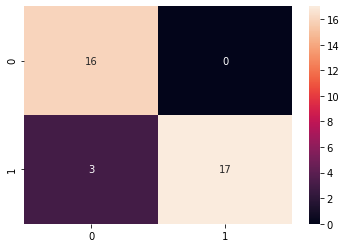

In [180]:
## Accuracy and Efficiency of our Model
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(cm, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [181]:
y_pred_proba= lr.predict_proba(X_test) [::,1]

In [182]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [183]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

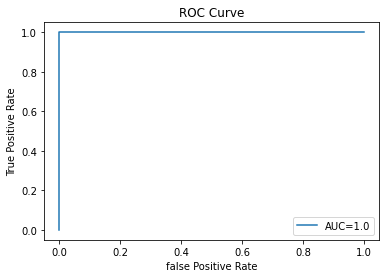

In [184]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

In [185]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(X_train,y_train)
svc_acc=cross_val_score(svc_classifier,X_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,X_train_std,y_train,cv=3,method='predict_proba')

In [186]:
svc_acc

array([0.57142857, 0.7037037 , 0.55555556])

In [187]:
svc_proba

array([[0.50549765, 0.49450235],
       [0.53828418, 0.46171582],
       [0.51247408, 0.48752592],
       [0.50888628, 0.49111372],
       [0.5       , 0.5       ],
       [0.50934402, 0.49065598],
       [0.52695555, 0.47304445],
       [0.52829013, 0.47170987],
       [0.54452124, 0.45547876],
       [0.52778505, 0.47221495],
       [0.50861572, 0.49138428],
       [0.53086911, 0.46913089],
       [0.48771884, 0.51228116],
       [0.51405312, 0.48594688],
       [0.51878197, 0.48121803],
       [0.52362076, 0.47637924],
       [0.53468936, 0.46531064],
       [0.52443743, 0.47556257],
       [0.54217991, 0.45782009],
       [0.50975838, 0.49024162],
       [0.5196755 , 0.4803245 ],
       [0.51342695, 0.48657305],
       [0.51512052, 0.48487948],
       [0.50983391, 0.49016609],
       [0.51170316, 0.48829684],
       [0.49015714, 0.50984286],
       [0.51923633, 0.48076367],
       [0.51736997, 0.48263003],
       [0.55269325, 0.44730675],
       [0.47631573, 0.52368427],
       [0.

In [188]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.49450235, 0.46171582, 0.48752592, 0.49111372, 0.5       ,
       0.49065598, 0.47304445, 0.47170987, 0.45547876, 0.47221495,
       0.49138428, 0.46913089, 0.51228116, 0.48594688, 0.48121803,
       0.47637924, 0.46531064, 0.47556257, 0.45782009, 0.49024162,
       0.4803245 , 0.48657305, 0.48487948, 0.49016609, 0.48829684,
       0.50984286, 0.48076367, 0.48263003, 0.44730675, 0.52368427,
       0.48320065, 0.45992633, 0.49158964, 0.45623686, 0.48448207,
       0.46883588, 0.48013201, 0.48120758, 0.49071163, 0.51713024,
       0.5124123 , 0.53422574, 0.5       , 0.54445476, 0.48009668,
       0.5201313 , 0.52825857, 0.4143186 , 0.46567131, 0.47835799,
       0.55189931, 0.54212131, 0.48131276, 0.52736304, 0.4914893 ,
       0.5       , 0.48069772, 0.5       , 0.51919662, 0.5       ,
       0.5       , 0.41726657, 0.45709255, 0.45029289, 0.50798224,
       0.40941162, 0.47313735, 0.48700061, 0.48069112, 0.47784798,
       0.49229649, 0.44666679, 0.56075663, 0.42565562, 0.43808

In [189]:
y_pred=svc_classifier.predict(X_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1]


In [190]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1]



accuracy score:91.666667
recall score:85.000000
[[16  0]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.85      0.92        20

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



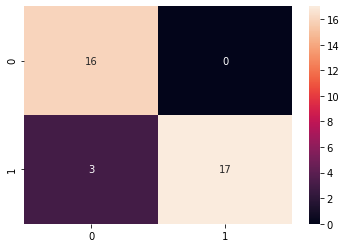

In [192]:
## Accuracy and Efficiency of our Model
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(cm, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [203]:
y_pred_proba= svc.predict_proba(X_test) [::,1]

In [204]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [205]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

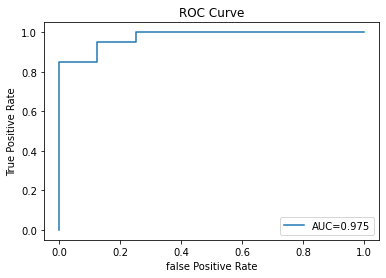

In [206]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

In [194]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(X_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [195]:
rmf_clf_acc=cross_val_score(rmf_clf,X_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,X_train_std,y_train,cv=3,method='predict_proba')

In [196]:
rmf_clf_acc

array([0.39285714, 0.44444444, 0.59259259])

In [197]:
rmf_proba

array([[0.70201601, 0.29798399],
       [0.50147042, 0.49852958],
       [0.47026473, 0.52973527],
       [0.70986217, 0.29013783],
       [0.67958583, 0.32041417],
       [0.64754567, 0.35245433],
       [0.39118819, 0.60881181],
       [0.47518938, 0.52481062],
       [0.27641702, 0.72358298],
       [0.36094966, 0.63905034],
       [0.47739129, 0.52260871],
       [0.45210433, 0.54789567],
       [0.74963439, 0.25036561],
       [0.70245301, 0.29754699],
       [0.47157826, 0.52842174],
       [0.46247139, 0.53752861],
       [0.25079242, 0.74920758],
       [0.50884368, 0.49115632],
       [0.54926502, 0.45073498],
       [0.47662286, 0.52337714],
       [0.51706431, 0.48293569],
       [0.50699365, 0.49300635],
       [0.45882158, 0.54117842],
       [0.43743012, 0.56256988],
       [0.53106039, 0.46893961],
       [0.74489567, 0.25510433],
       [0.54240024, 0.45759976],
       [0.64134262, 0.35865738],
       [0.67037785, 0.32962215],
       [0.501109  , 0.498891  ],
       [0.

In [198]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:85.000000
[[16  0]
 [ 3 17]]


In [207]:
y_pred_proba= rmf .predict_proba(X_test) [::,1]

In [208]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [209]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

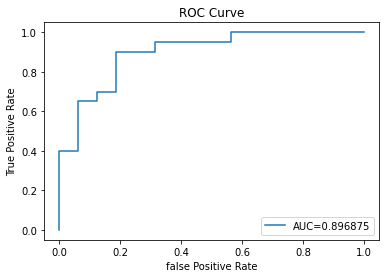

In [210]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

In [218]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

C:\Users\selor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Name,Score
0,KNN,0.916667
1,LR,0.972222
2,SVC,0.916667
3,DT,0.722222
4,RF,0.833333


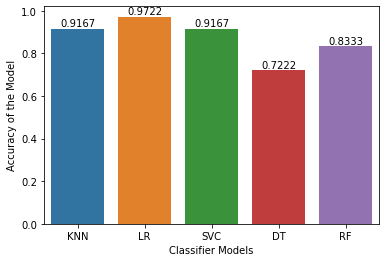

In [219]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [220]:
tr_split['Score'].max() 

0.9722222222222222

In [221]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(roc_auc_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

C:\Users\selor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Name,Score
0,KNN,0.9250
1,LR,0.9750
2,SVC,0.9250
3,DT,0.7500
4,RF,0.8875


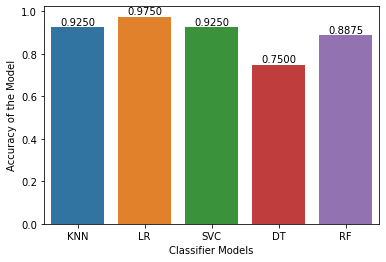

In [222]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [223]:
tr_split['Score'].max() 

0.975

## Logistic Regression is the best model for Prediction both on accuracy and roc_auc
